In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import scipy

import gm2
import trfp
import plotting_functions as plt2
import analysis_helper as helper
import helper_function_candidates as helper_old

def load_trolley_run(filename, key):
    return helper_old.trolley_footprint_replacement(
        helper.calc_moment_df(
            pd.read_hdf(filename, key)
        )
    )


Welcome to JupyROOT 6.12/04


## Load in the run 1 trolley pairs

Calculate sync offsets, and store them in a 71x5x12 array.

In [2]:
%%time

trolley_runs = {}
sync_offsets = np.zeros((72,5,12))
delta_ts = np.zeros((72,6,12))

trolley_pairs = [['60hr_1', '60hr_2'],
                 ['9d_1', '9d_2'], ['9d_3', '9d_4'], ['9d_4', '9d_5'], ['9d_5', '9d_6'],
                 ['eg_2', 'eg_3'], ['eg_4', 'eg_5'], ['eg_6', 'eg_7'], ['eg_7', 'eg_8'],
                 ['hk_1', 'hk_2'], ['hk_2', 'hk_3'],
                 ['lk_1', 'lk_2']
                ]

runs = ['60hr_1', '60hr_2',
        '9d_1', '9d_2', '9d_3', '9d_4', '9d_5', '9d_6',
        'eg_2', 'eg_3', 'eg_4', 'eg_5', 'eg_6', 'eg_7', 'eg_8',
        'hk_1', 'hk_2', 'hk_3',
        'lk_1', 'lk_2']

files = {}
keys = {}

for run in runs:
    if run[:2] == '60':
        files[run] = 'hdf5/60hr.h5'
    elif run[:2] == '9d':
        files[run] = 'hdf5/9day.h5'
    elif run[:2] == 'eg':
        files[run] = 'hdf5/endgame.h5'
    elif run[:2] == 'hk':
        files[run] = 'hdf5/highkick.h5'
    elif run[:2] == 'lk':
        files[run] = 'hdf5/lowkick.h5'
    
    keys[run] = 'tr_df_' + run[-1]

verbose = False
for run in runs:
    if not verbose: clear_output()
    print run
    print files[run]
    print keys[run]
    trolley_runs[run] = load_trolley_run(files[run], keys[run])
    print '\n'

ii = 0
for pair in trolley_pairs:
    sync_offsets[:,:,ii], delta_ts[:,:,ii] = helper.sync_offset_calc(trolley_runs[pair[0]], trolley_runs[pair[1]])
    ii += 1


lk_2
hdf5/lowkick.h5
tr_df_2
Finished calculating all moments for 4338 events.
Removing trolley image from station 71.                              

CPU times: user 1min 49s, sys: 2min, total: 3min 50s
Wall time: 1min 17s


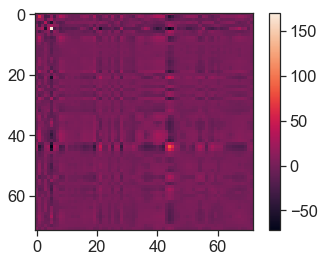

In [57]:
sync_cov = np.cov(sync_offsets[:,4,:])
sync_var = np.array([sync_cov[i,i] for i in range(72)])

plt.imshow( np.sign(sync_cov)*np.sqrt(np.abs(sync_cov)))
plt.colorbar()

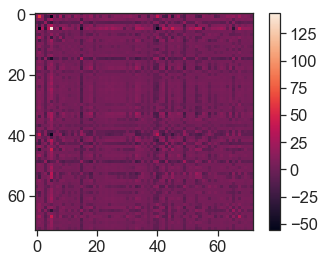

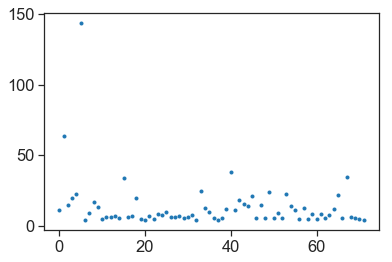

In [51]:
plt.plot(np.sqrt(sync_var), '.')

In [52]:
np.sqrt(np.sum(sync_var))/72

2.664702877272099

In [53]:
np.sqrt(np.sum(sync_cov))/72

4.918339700626131

In [23]:
print np.max(sync_cov)
print np.min(sync_cov)

249840.26606311282
-33631.43247063857


In [28]:
print np.sqrt(sync_cov[1,1])
print np.sqrt(sync_cov[3,3])
print np.sqrt(sync_cov[5,5])

154.31349062062796
83.14195759859963
499.84024054002776


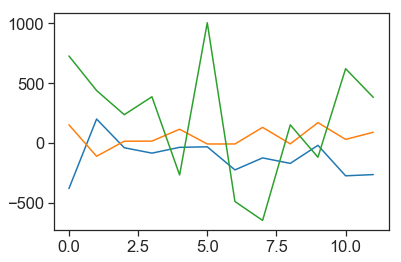

In [25]:
plt.plot(sync_offsets[1,0,:])
plt.plot(sync_offsets[3,0,:])
plt.plot(sync_offsets[5,0,:])


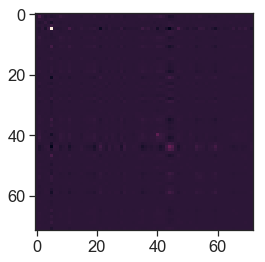

In [17]:
# print np.round(np.cov(sync_offsets[:,0,:]),1)



plt.imshow(np.cov(sync_offsets[:,0,:]))

In [ ]:
print sync_offsets[0,0,:]

In [ ]:
filename = 'hdf5/60hr.h5'
run = '60hr_1'
print run
trolley_runs[run] = load_trolley_run(filename, 'tr_df_1')
print ''
run = '60hr_2'
print run
trolley_runs['60hr_2'] = load_trolley_run(filename, 'tr_df_2')
sync_offsets[:,:,0], delta_ts[:,:,0] = helper.sync_offset_calc(trolley_runs['60hr_1'], trolley_runs['60hr_2'])

filename = 'hdf5/9day.h5'
print '60hr_1'
trolley_runs['60hr_1'] = load_trolley_run(filename, 'tr_df_1')
print ''
print '60hr_2'
trolley_runs['60hr_2'] = load_trolley_run(filename, 'tr_df_2')
print ''
print '60hr_2'
trolley_runs['60hr_2'] = load_trolley_run(filename, 'tr_df_2')
sync_offsets[:,:,0], delta_ts[:,:,0] = helper.sync_offset_calc(trolley_runs['60hr_1'], trolley_runs['60hr_2'])

In [ ]:
filename = 'hdf5/9day.h5'

print 'tr run 1'
tr_moment_df_1 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_1'))
print 'tr run 2'
tr_moment_df_2 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_2'))
print 'tr run 3'
tr_moment_df_3 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_3'))
print 'tr run 4'
tr_moment_df_4 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_4'))
print 'tr run 5'
tr_moment_df_5 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_5'))
print 'tr run 6'
tr_moment_df_6 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_6'))

tr_corr_df_1 = helper_old.trolley_footprint_replacement(tr_moment_df_1)
tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)
tr_corr_df_3 = helper_old.trolley_footprint_replacement(tr_moment_df_3)
tr_corr_df_4 = helper_old.trolley_footprint_replacement(tr_moment_df_4)
tr_corr_df_5 = helper_old.trolley_footprint_replacement(tr_moment_df_5)
tr_corr_df_6 = helper_old.trolley_footprint_replacement(tr_moment_df_6)

sync_offsets_1, delta_t_1 = helper.sync_offset_calc(tr_corr_df_1, tr_corr_df_2)
sync_offsets_2, delta_t_2 = helper.sync_offset_calc(tr_corr_df_3, tr_corr_df_4)
sync_offsets_3, delta_t_3 = helper.sync_offset_calc(tr_corr_df_4, tr_corr_df_5)
sync_offsets_4, delta_t_4 = helper.sync_offset_calc(tr_corr_df_5, tr_corr_df_6)


t_9day_1 = np.mean(delta_t_1[:,0])
t_9day_2 = np.mean(delta_t_2[:,0])
t_9day_3 = np.mean(delta_t_3[:,0])
t_9day_4 = np.mean(delta_t_4[:,0])

DM_9day_1 = np.mean(sync_offsets_1[:,0])
DM_9day_2 = np.mean(sync_offsets_2[:,0])
DM_9day_3 = np.mean(sync_offsets_3[:,0])
DM_9day_4 = np.mean(sync_offsets_4[:,0])


In [ ]:
filename = 'hdf5/endgame.h5'

print 'tr run 2'
tr_moment_df_2 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_2'))
print 'tr run 3'
tr_moment_df_3 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_3'))
print 'tr run 4'
tr_moment_df_4 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_4'))
print 'tr run 5'
tr_moment_df_5 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_5'))
print 'tr run 6'
tr_moment_df_6 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_6'))
print 'tr run 7'
tr_moment_df_7 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_7'))
print 'tr run 8'
tr_moment_df_8 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_8'))

tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)
tr_corr_df_3 = helper_old.trolley_footprint_replacement(tr_moment_df_3)
tr_corr_df_4 = helper_old.trolley_footprint_replacement(tr_moment_df_4)
tr_corr_df_5 = helper_old.trolley_footprint_replacement(tr_moment_df_5)
tr_corr_df_6 = helper_old.trolley_footprint_replacement(tr_moment_df_6)
tr_corr_df_7 = helper_old.trolley_footprint_replacement(tr_moment_df_7)
tr_corr_df_8 = helper_old.trolley_footprint_replacement(tr_moment_df_8)

sync_offsets_1, delta_t_1 = helper.sync_offset_calc(tr_corr_df_2, tr_corr_df_3)
sync_offsets_2, delta_t_2 = helper.sync_offset_calc(tr_corr_df_4, tr_corr_df_5)
sync_offsets_3, delta_t_3 = helper.sync_offset_calc(tr_corr_df_6, tr_corr_df_7)
sync_offsets_4, delta_t_4 = helper.sync_offset_calc(tr_corr_df_7, tr_corr_df_8)

t_eg_1 = np.mean(delta_t_1[:,0])
t_eg_2 = np.mean(delta_t_2[:,0])
t_eg_3 = np.mean(delta_t_3[:,0])
t_eg_4 = np.mean(delta_t_4[:,0])

DM_eg_1 = np.mean(sync_offsets_1[:,0])
DM_eg_2 = np.mean(sync_offsets_2[:,0])
DM_eg_3 = np.mean(sync_offsets_3[:,0])
DM_eg_4 = np.mean(sync_offsets_4[:,0])


In [ ]:
filename = 'hdf5/highkick.h5'

print 'tr run 1'
tr_moment_df_1 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_1'))
print 'tr run 2'
tr_moment_df_2 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_2'))
print 'tr run 3'
tr_moment_df_3 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_3'))

tr_corr_df_1 = helper_old.trolley_footprint_replacement(tr_moment_df_1)
tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)
tr_corr_df_3 = helper_old.trolley_footprint_replacement(tr_moment_df_3)

sync_offsets_1, delta_t_1 = helper.sync_offset_calc(tr_corr_df_1, tr_corr_df_2)
sync_offsets_2, delta_t_2 = helper.sync_offset_calc(tr_corr_df_2, tr_corr_df_3)


t_hk_1 = np.mean(delta_t_1[:,0])
t_hk_2 = np.mean(delta_t_2[:,0])

DM_hk_1 = np.mean(sync_offsets_1[:,0])
DM_hk_2 = np.mean(sync_offsets_2[:,0])

In [ ]:
filename = 'hdf5/lowkick.h5'

print 'tr run 1'
tr_moment_df_1 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_1'))
print 'tr run 2'
tr_moment_df_2 = helper.calc_moment_df(pd.read_hdf(filename, 'tr_df_2'))

tr_corr_df_1 = helper_old.trolley_footprint_replacement(tr_moment_df_1)
tr_corr_df_2 = helper_old.trolley_footprint_replacement(tr_moment_df_2)

sync_offsets_1, delta_t_1 = helper.sync_offset_calc(tr_corr_df_1, tr_corr_df_2)


t_lk_1 = np.mean(delta_t_1[:,0])
DM_lk_1 = np.mean(sync_offsets_1[:,0])

In [ ]:
times = [t_60hr_1,
         t_9day_1, t_9day_2, t_9day_3, t_9day_4,
         t_eg_1, t_eg_2, t_eg_3, t_eg_4,
         t_hk_2, t_hk_2,
         t_lk_1]
times = np.array(times)

DMs =[DM_60hr_1,
      DM_9day_1, DM_9day_2, DM_9day_3, DM_9day_4,
      DM_eg_1, DM_eg_2, DM_eg_3, DM_eg_4,
      DM_hk_1, DM_hk_2,
      DM_lk_1]
DMs = np.array(DMs)

print times
print DMs


In [ ]:
used = (DMs**2/times)[[0,1,2,3,4,6,7,8,9,10,11]]
print np.sqrt(np.mean(used))

In [ ]:
# plt.plot(times, DMs**2, '.')

print np.mean(DMs**2/times)
print np.std(DMs**2/times)
print np.sqrt(np.mean(DMs**2/times))
print np.sqrt(np.std(DMs**2/times))

print np.sqrt(np.mean(DMs**2/times))*np.sqrt(3600*72)
print np.sqrt(np.std(DMs**2/times))*np.sqrt(3600*72)

plt.plot(DMs**2/times, '.')
plt.title('Random Walk Rates')
plt.ylabel('$\Delta M^2/t$  $(Hz^2/sec)$')
plt.xlabel('trolley pair')